In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/PS'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "ps_slice"
sample = "PS"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold') # get original anndata after Sparrow

In [3]:
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'KC_staining.csv'))
df = df[df.filtered==False]
anndata.obs['protein_staining_KC'] = df['intensity_mean'].to_list()

In [4]:
scores_subt_mean_it = anndata.uns['own_score_genes_BasicMartin_12']['Kupf']
scores_binned = anndata.uns['score_genes_original_BasicMartin_12']['Kupf']
scores_binned_KC_annotated = scores_binned[anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf']
scores_subt_mean_it_KC_annotated = scores_subt_mean_it[(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()]
scores_subt_mean_it_no_KC_annotated = scores_subt_mean_it[(~(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf')).tolist()]
scores_binned_no_KC_annotated = scores_binned[(~(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf')).tolist()]

scores_subt_mean_it_scaled = (scores_subt_mean_it - min(scores_subt_mean_it))/(max(scores_subt_mean_it) - min(scores_subt_mean_it))
scores_binned_scaled = (scores_binned - min(scores_binned))/(max(scores_binned) - min(scores_binned))
anndata.obs['scores_KC_subt_mean_it_scaled'] = scores_subt_mean_it_scaled.tolist()
anndata.obs['scores_KC_binned_scaled'] = scores_binned_scaled

indices_KC_Subt_mean_it = anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf'
indices_KC_Subt_mean_it = [i for i, x in enumerate(indices_KC_Subt_mean_it) if x]
indices_KC_Binned = anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf'
indices_KC_Binned = [i for i, x in enumerate(indices_KC_Binned) if x]
indices_KC_both = set(indices_KC_Subt_mean_it).intersection(indices_KC_Binned)
indices_KC_both = list(indices_KC_both)
indices_only_Subt_mean_it = list(set(indices_KC_Subt_mean_it).difference(indices_KC_Binned))
indices_only_Binned = list(set(indices_KC_Binned).difference(indices_KC_Subt_mean_it))
indices_not_KC = list(set(range(len(anndata.obs))).difference(set(indices_KC_Subt_mean_it).union(indices_KC_Binned)))

score_binned_KC_both = scores_binned[indices_KC_both]
score_binned_KC_only_Subt_mean_it = scores_binned[indices_only_Subt_mean_it]
score_binned_KC_only_Binned = scores_binned[indices_only_Binned]
score_binned_KC_none = scores_binned[indices_not_KC]
score_binned_KC_Binned = scores_binned[indices_KC_Binned]
score_binned_KC_Subt_mean_it = scores_binned[indices_KC_Subt_mean_it]

scores_subt_mean_it_KC_both = scores_subt_mean_it[indices_KC_both]
scores_subt_mean_it_KC_only_Subt_mean_it = scores_subt_mean_it[indices_only_Subt_mean_it]
scores_subt_mean_it_KC_only_Binned = scores_subt_mean_it[indices_only_Binned]
scores_subt_mean_it_KC_none = scores_subt_mean_it[indices_not_KC]
scores_subt_mean_it_KC_Binned = scores_subt_mean_it[indices_KC_Binned]
scores_subt_mean_it_KC_Subt_mean_it = scores_subt_mean_it[indices_KC_Subt_mean_it]

protein_staining_KC = anndata.obs['protein_staining_KC']
protein_staining_KC_annotated_subt_mean_it = protein_staining_KC[(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf').tolist()]
protein_staining_KC_annotated_binned = protein_staining_KC[(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf').tolist()]
protein_staining_no_KC_annotated_subt_mean_it = protein_staining_KC[(~(anndata.obs['annotation_own_score_genes_BasicMartin_12']=='Kupf')).tolist()]
protein_staining_no_KC_annotated_binned = protein_staining_KC[(~(anndata.obs['annotation_score_genes_original_BasicMartin_12']=='Kupf')).tolist()]
protein_staining_KC_both = protein_staining_KC[indices_KC_both]
protein_staining_KC_only_Subt_mean_it = protein_staining_KC[indices_only_Subt_mean_it]
protein_staining_KC_only_Binned = protein_staining_KC[indices_only_Binned]
protein_staining_KC_none = protein_staining_KC[indices_not_KC]

count_all_cells = len(anndata.obs)
count_only_subt_min_it = len(indices_only_Subt_mean_it)
count_only_binned = len(indices_only_Binned)
count_both = len(indices_KC_both)
count_none = len(indices_not_KC)
count_binned = len(indices_KC_Binned)
count_subt_mean_it = len(indices_KC_Subt_mean_it)

anndata.obs['compare_annotation_KC'] = anndata.obs['annotation_own_score_genes_BasicMartin_12'].astype(str)
anndata.obs['compare_annotation_KC'][indices_KC_both] = 'Both'
anndata.obs['compare_annotation_KC'][indices_only_Subt_mean_it] = 'Only Subt_Mean_It'
anndata.obs['compare_annotation_KC'][indices_only_Binned] = 'Only Binned'
anndata.obs['compare_annotation_KC'][indices_not_KC] = 'None'
print(anndata.obs['compare_annotation_KC'].value_counts())

None                 10900
Both                   736
Only Subt_Mean_It      106
Only Binned             52
Name: compare_annotation_KC, dtype: int64


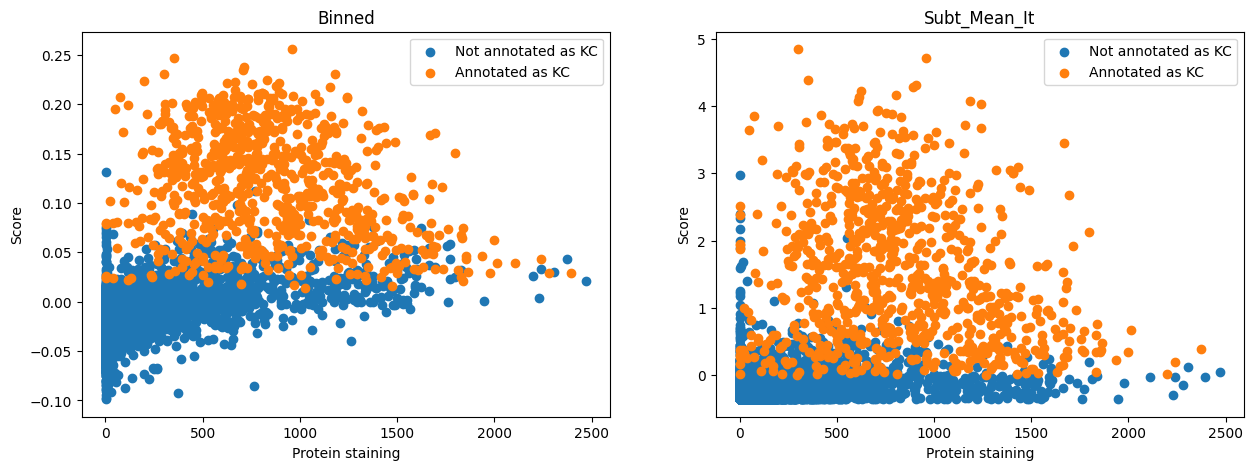

In [5]:
# plot scores in function of protein staining and indicate points with 'Kupf' in anndata.obs['own_score_genes_BasicMartin_12']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[1].scatter(protein_staining_no_KC_annotated_subt_mean_it,scores_subt_mean_it_no_KC_annotated)
ax[1].scatter(protein_staining_KC_annotated_subt_mean_it,scores_subt_mean_it_KC_annotated)
ax[1].set_title('Subt_Mean_It')
ax[1].set_xlabel('Protein staining')
ax[1].set_ylabel('Score')
ax[1].legend(['Not annotated as KC', 'Annotated as KC'])
ax[0].scatter(protein_staining_no_KC_annotated_binned,scores_binned_no_KC_annotated)
ax[0].scatter(protein_staining_KC_annotated_binned,scores_binned_KC_annotated)
ax[0].set_title('Binned')
ax[0].set_xlabel('Protein staining')
ax[0].set_ylabel('Score')
ax[0].legend(['Not annotated as KC', 'Annotated as KC'])

In [6]:
from scipy.stats import pearsonr
correlation_binned = pearsonr(protein_staining_KC,scores_binned)[0]
print('Correlation between scores binned and protein staining:')
print(correlation_binned)
correlation_binned_KC_annotated = pearsonr(protein_staining_KC_annotated_binned,scores_binned_KC_annotated)[0]
print('Correlation between scores binned and protein staining (only KC annotated):')
print(correlation_binned_KC_annotated)
correlation_subt_mean_it = pearsonr(protein_staining_KC,scores_subt_mean_it)[0]
print('Correlation between scores subt_mean_it and protein staining:')
print(correlation_subt_mean_it)
correlation_subt_mean_it_KC_annotated = pearsonr(protein_staining_KC_annotated_subt_mean_it,scores_subt_mean_it_KC_annotated)[0]
print('Correlation between scores subt_mean_it and protein staining (only KC annotated):')
print(correlation_subt_mean_it_KC_annotated)

Correlation between scores binned and protein staining:
0.5826963940152903
Correlation between scores binned and protein staining (only KC annotated):
-0.2527751861849699
Correlation between scores subt_mean_it and protein staining:
0.5444313659434867
Correlation between scores subt_mean_it and protein staining (only KC annotated):
-0.2166981906859057


In [7]:
anndata.uns['compare_annotation_KC_colors'] = ['#1f77b4', "#9f9f9f", '#2ca02c', '#d62728']

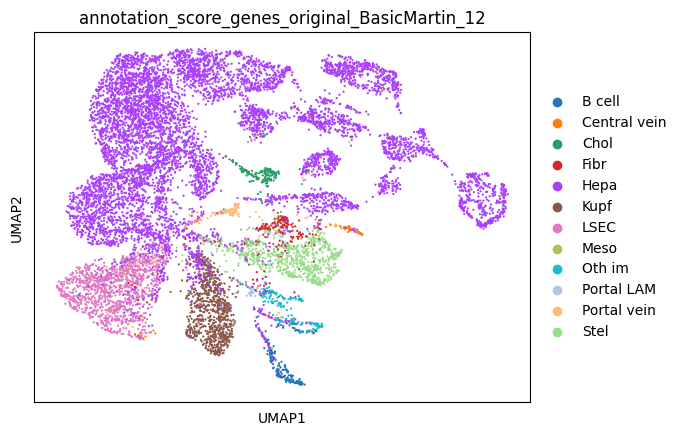

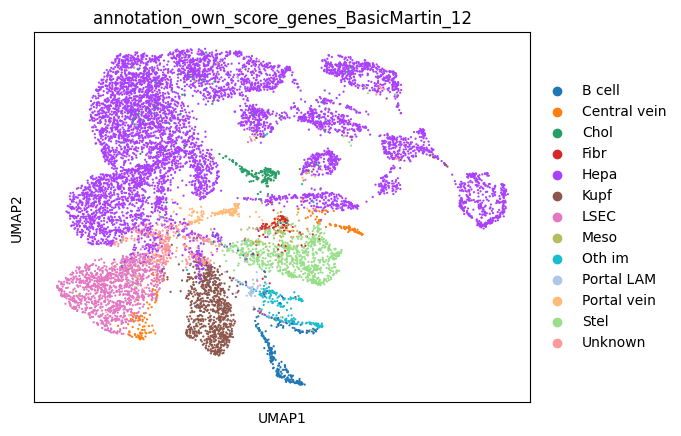

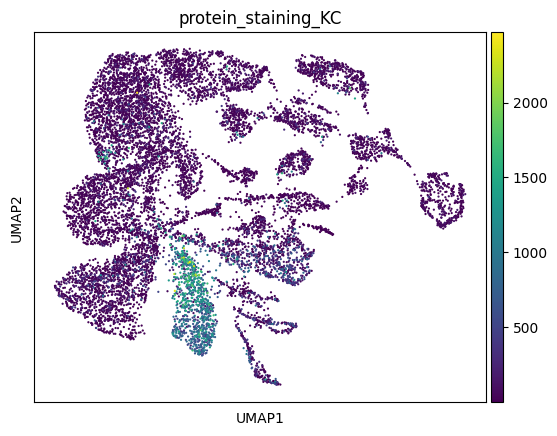

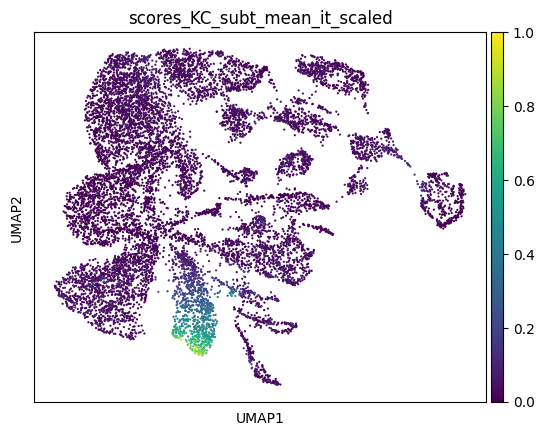

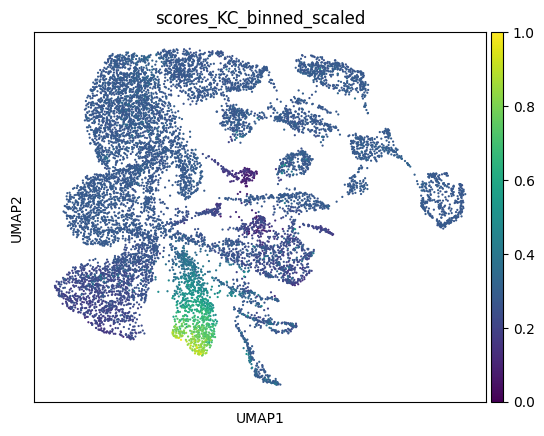

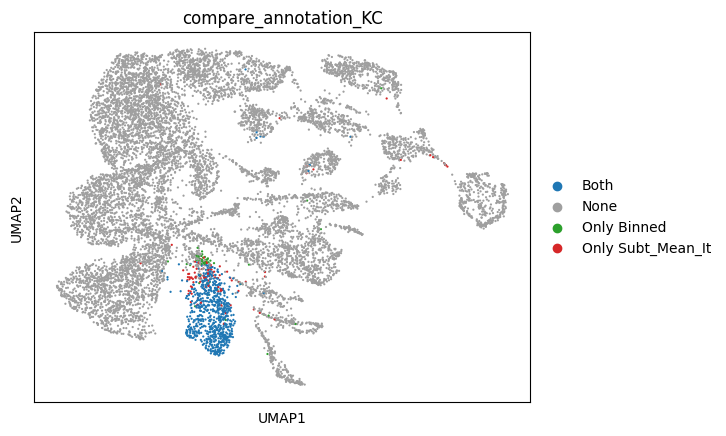

In [8]:
sc.pl.umap(anndata,color=['annotation_score_genes_original_BasicMartin_12'])
sc.pl.umap(anndata,color=['annotation_own_score_genes_BasicMartin_12'])
sc.pl.umap(anndata,color=['protein_staining_KC'])
sc.pl.umap(anndata,color=['scores_KC_subt_mean_it_scaled'])
sc.pl.umap(anndata,color=['scores_KC_binned_scaled'])
sc.pl.umap(anndata,color=['compare_annotation_KC'])

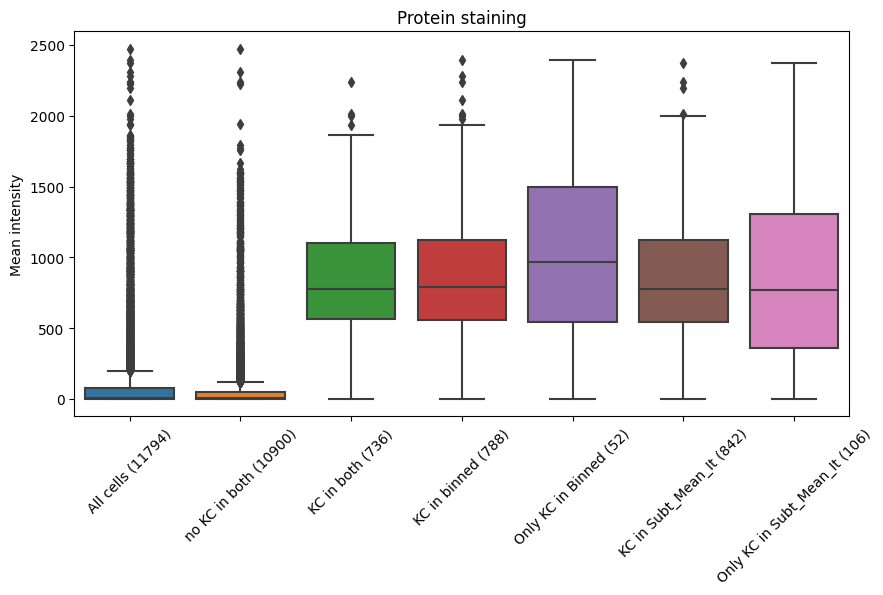

In [9]:
ax = sns.boxplot(data=[protein_staining_KC,protein_staining_KC_none,protein_staining_KC_both,protein_staining_KC_annotated_binned,protein_staining_KC_only_Binned,protein_staining_KC_annotated_subt_mean_it,protein_staining_KC_only_Subt_mean_it])
names = ['All cells'+' ('+str(count_all_cells)+')','no KC in both'+' ('+str(count_none)+')','KC in both ('+str(count_both)+')','KC in binned ('+str(count_binned)+')','Only KC in Binned ('+str(count_only_binned)+')','KC in Subt_Mean_It ('+str(count_subt_mean_it)+')','Only KC in Subt_Mean_It ('+str(count_only_subt_min_it)+')']
ax.set(xticklabels=names)
# increase the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Protein staining')
plt.ylabel('Mean intensity')
plt.xticks(rotation=45)
plt.show()

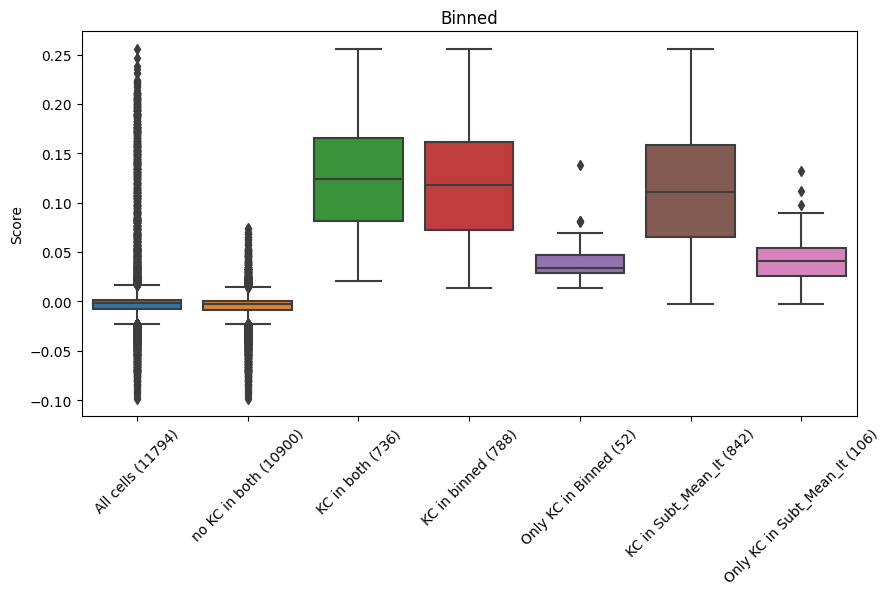

In [10]:
ax = sns.boxplot(data=[scores_binned, score_binned_KC_none, score_binned_KC_both, score_binned_KC_Binned, score_binned_KC_only_Binned, score_binned_KC_Subt_mean_it, score_binned_KC_only_Subt_mean_it])
names = ['All cells'+' ('+str(count_all_cells)+')','no KC in both'+' ('+str(count_none)+')','KC in both ('+str(count_both)+')','KC in binned ('+str(count_binned)+')','Only KC in Binned ('+str(count_only_binned)+')','KC in Subt_Mean_It ('+str(count_subt_mean_it)+')','Only KC in Subt_Mean_It ('+str(count_only_subt_min_it)+')']
ax.set(xticklabels=names)
# increase the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Binned')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

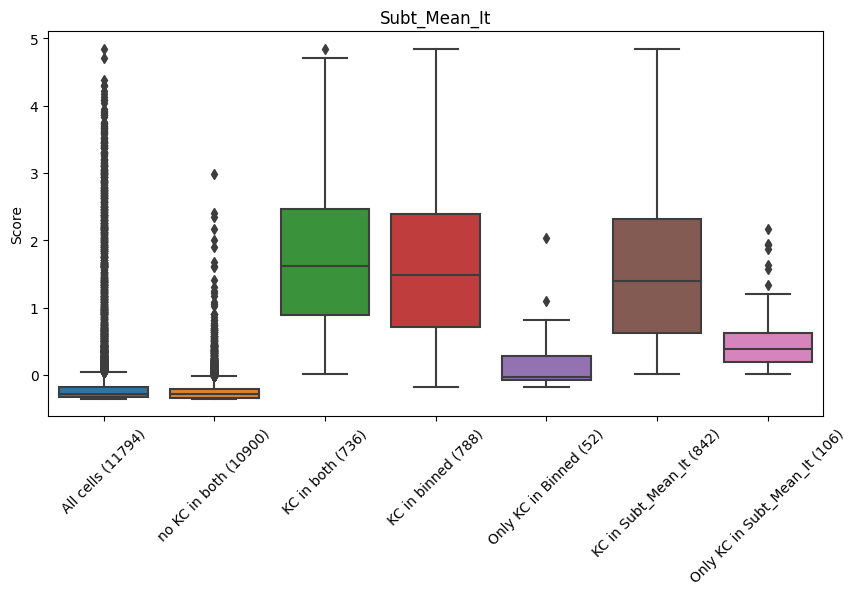

In [11]:
ax = sns.boxplot(data=[scores_subt_mean_it, scores_subt_mean_it_KC_none, scores_subt_mean_it_KC_both, scores_subt_mean_it_KC_Binned, scores_subt_mean_it_KC_only_Binned, scores_subt_mean_it_KC_Subt_mean_it, scores_subt_mean_it_KC_only_Subt_mean_it])
names = ['All cells'+' ('+str(count_all_cells)+')','no KC in both'+' ('+str(count_none)+')','KC in both ('+str(count_both)+')','KC in binned ('+str(count_binned)+')','Only KC in Binned ('+str(count_only_binned)+')','KC in Subt_Mean_It ('+str(count_subt_mean_it)+')','Only KC in Subt_Mean_It ('+str(count_only_subt_min_it)+')']
ax.set(xticklabels=names)
# increase the size of the plot
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Subt_Mean_It')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()